In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

In [194]:
#Import data from the pilot repository
df = pd.read_csv('RP0_Coordinator_T4_Friday.csv', sep=',',  header=0)
df.shape

(372, 11)

In [195]:
df.head(5)

,LogNumber,Date,Time,AccX,AccY,AccZ,Latitude,Longitude,Speed,PassIn,PassOut
0,London/25/1,09/08/2019,09:07:53 a. m.,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0,0
1,London/25/10,09/08/2019,09:10:58 a. m.,0.000000,0.000000,0.000000,51.523066,-0.038455,0.00,0,1
2,London/25/100,09/08/2019,09:38:05 a. m.,-1.206787,-0.284668,0.803711,51.533750,-0.050936,30.19,0,0
3,London/25/101,09/08/2019,09:38:24 a. m.,-1.052979,-0.004150,0.284424,51.533661,-0.050486,0.00,0,0
4,London/25/102,09/08/2019,09:38:42 a. m.,-1.143799,-0.211426,0.358398,51.533592,-0.050329,7.04,0,0


In [196]:
#Sort rows according to Time
df_filtered = df[df['AccX'] != 0.0].sort_values('Time', ascending= True).reset_index(drop=True)
df_filtered.head(50)

,LogNumber,Date,Time,AccX,AccY,AccZ,Latitude,Longitude,Speed,PassIn,PassOut
0,London/25/16,09/08/2019,09:12:48 a. m.,-1.154541,-0.113037,0.400391,51.523068,-0.038511,5.00,0,0
1,London/25/17,09/08/2019,09:13:06 a. m.,-1.290771,-0.254639,0.410400,51.523149,-0.038004,9.45,0,0
2,London/25/18,09/08/2019,09:13:24 a. m.,-1.541992,-0.160645,0.513916,51.523256,-0.038053,10.74,0,0
3,London/25/19,09/08/2019,09:13:42 a. m.,-0.970703,-0.001953,0.327148,51.523041,-0.038471,0.00,0,0
4,London/25/20,09/08/2019,09:14:00 a. m.,-1.062500,-0.117676,0.500977,51.522967,-0.038519,7.59,0,0
5,London/25/22,09/08/2019,09:14:36 a. m.,-0.966797,-0.228760,0.424561,51.522737,-0.039775,7.96,0,0
6,London/25/23,09/08/2019,09:15:02 a. m.,-1.121582,-0.236572,0.249268,51.522793,-0.039800,8.70,0,0
7,London/25/24,09/08/2019,09:15:21 a. m.,-0.984375,-0.067383,0.461426,51.523263,-0.039131,37.78,0,0
8,London/25/25,09/08/2019,09:15:39 a. m.,-1.075684,0.043213,0.195801,51.524487,-0.036489,33.34,0,0
9,London/25/26,09/08/2019,09:15:57 a. m.,-0.944824,-0.139404,0.467529,51.524879,-0.035546,18.71,0,0


In [197]:
#Filter all the values that were obtained after the pilot was finished and could potentially affect our model
df_filtered.drop(df_filtered.tail(60).index,inplace=True)

In [198]:
df_filtered.shape

(297, 11)

In [199]:
#Get the characteristics of the data, including mean, st deviation and quantiles
df_filtered.describe()

,AccX,AccY,AccZ,Latitude,Longitude,Speed,PassIn,PassOut
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.0,297.0
mean,-1.080552,-0.081375,0.405808,50.999789,-0.037757,11.647003,0.0,0.0
std,0.200614,0.088195,0.091321,5.160467,0.013171,14.151734,0.0,0.0
min,-1.902100,-0.413574,0.195801,0.000000,-0.066991,0.000000,0.0,0.0
25%,-1.187256,-0.118164,0.353027,51.513825,-0.050292,0.000000,0.0,0.0
50%,-1.042236,-0.091064,0.378662,51.522962,-0.033158,2.780000,0.0,0.0
75%,-0.906738,-0.045898,0.445312,51.532289,-0.028135,22.410000,0.0,0.0
max,-0.855957,0.547852,0.803711,51.537317,0.000000,47.040000,0.0,0.0


In [200]:
#test = pd.cut(df_filtered['AccX'],bins = 50)
#test.head(5)

0     (-1.17, -1.149]
1    (-1.295, -1.274]
2    (-1.546, -1.525]
3    (-0.981, -0.961]
4    (-1.065, -1.044]
Name: AccX, dtype: category
Categories (50, interval[float64]): [(-1.903, -1.881] < (-1.881, -1.86] < (-1.86, -1.839] < (-1.839, -1.818] ... (-0.94, -0.919] < (-0.919, -0.898] < (-0.898, -0.877] < (-0.877, -0.856]]

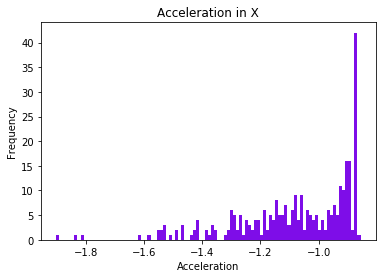

In [201]:
#Plot the histogram for Acceleration in X
plt.hist(df_filtered['AccX'], bins = 100, histtype='bar', color='#7E0DE8')
plt.xlabel('Acceleration')
plt.ylabel('Frequency')
plt.title('Acceleration in X')

mn, mx = plt.xlim()
x = np.linspace(mn, mx, 301)


Text(0.5, 1.0, 'Acceleration in Y')

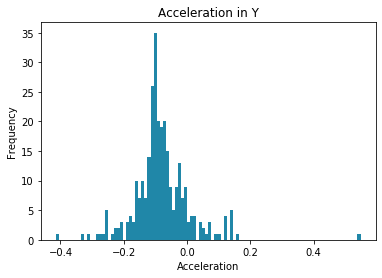

In [202]:
#Plot the histogram for the Acceleration in Y
plt.hist(df_filtered['AccY'], bins = 100, histtype='bar', color='#2087A8')
plt.xlabel('Acceleration')
plt.ylabel('Frequency')
plt.title('Acceleration in Y')

Text(0.5, 1.0, 'Acceleration in Z')

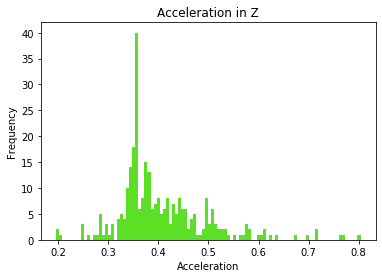

In [203]:
#Plot the histogram for the Acceleration in Z
plt.hist(df_filtered['AccZ'], bins = 100, histtype='bar', color='#5CE026')
plt.xlabel('Acceleration')
plt.ylabel('Frequency')
plt.title('Acceleration in Z')

Text(0.5, 1.0, 'Acceleration in time')

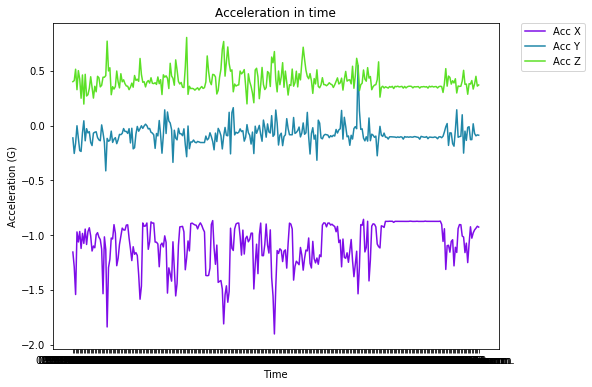

In [204]:
#Plot the comparison of all three variables to understand their behaviour and relationship
plt.figure(num = None, figsize=[8,6])
plt.plot(df_filtered['Time'], df_filtered['AccX'], color='#7E0DE8', label="Acc X")
plt.plot(df_filtered['Time'], df_filtered['AccY'], color='#2087A8', label="Acc Y")
plt.plot(df_filtered['Time'], df_filtered['AccZ'], color='#5CE026', label="Acc Z")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Time')
plt.ylabel('Acceleration (G)')
plt.title('Acceleration in time')

In [205]:
 #Obtain the mean for each one of the components and place them in an array
meanX = df_filtered['AccX'].mean()
meanY = df_filtered['AccY'].mean()
meanZ = df_filtered['AccZ'].mean()
meanAcc = [meanX,meanY,meanZ]
meanAcc

[-1.0805524319461273, -0.08137527624579123, 0.4058077520740737]

In [206]:
#Create a new Dataframe with only the variables that we require
acc_matrix = pd.concat([df_filtered['AccX'],df_filtered['AccY'],df_filtered['AccZ']],axis = 1)

In [207]:
#Obtain the covariance of all 3 components
cov = acc_matrix.cov()

In [209]:
#Model a multivariate Gaussian distribution with all three variables, considering the mean and cov:
AD_Model = multivariate_normal.pdf(acc_matrix, mean=meanAcc, cov=cov)

Text(0.5, 1.0, 'Multivariate Gaussian Model')

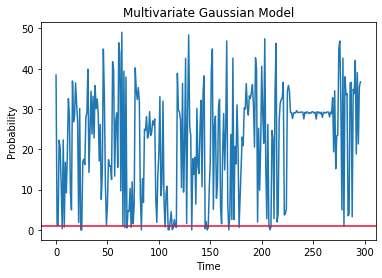

In [218]:
#Plot the model in relation to time. The threshold is shown with the red line.
plt.plot(AD_Model)
plt.axhline(y=1, color='#E80D35', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.title('Multivariate Gaussian Model')

In [211]:
#Transform the numpy array into a Dataframe
ad_frame = pd.DataFrame(AD_Model)

In [212]:
#We define the threshold to be 1%. Any value with pdf<1 will be considered an anomaly.
threshold = 1
m = []
for i in range(0,len(ad_frame)):
    if ad_frame.loc[i,0]<=threshold:
        m.append("Anomaly")
    else:
        m.append("Regular")

In [213]:
acX = acc_matrix['AccX'].reset_index(drop=True)
acY = acc_matrix['AccY'].reset_index(drop=True)
acZ = acc_matrix['AccZ'].reset_index(drop=True)

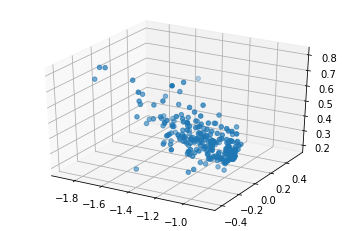

In [188]:
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(acX,acY,acZ)

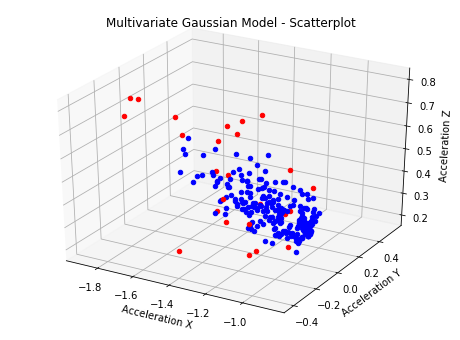

In [221]:
#Plot the acceleration in 3D. All values that are marked as red are the same that those under the red line in our previous graph
fig2 = plt.figure(figsize=[8,6])
ax = fig2.add_subplot(111, projection='3d')

for i in range(0,len(m)):
    x = acX[i]
    y = acY[i]
    z = acZ[i]
    t = m[i]
    
    if t == 'Regular':
        ax.scatter(x, y, z, color='blue')
    else:
        ax.scatter(x, y, z, color='red')
#        print(i)

ax.set_xlabel('Acceleration X')
ax.set_ylabel('Acceleration Y')
ax.set_zlabel('Acceleration Z')
plt.title('Multivariate Gaussian Model - Scatterplot')

plt.show()

In [217]:
df_filtered['Evaluation'] = m
df_filtered

,LogNumber,Date,Time,AccX,AccY,AccZ,Latitude,Longitude,Speed,PassIn,PassOut,Evaluation
0,London/25/16,09/08/2019,09:12:48 a. m.,-1.154541,-0.113037,0.400391,51.523068,-0.038511,5.00,0,0,Regular
1,London/25/17,09/08/2019,09:13:06 a. m.,-1.290771,-0.254639,0.410400,51.523149,-0.038004,9.45,0,0,Regular
2,London/25/18,09/08/2019,09:13:24 a. m.,-1.541992,-0.160645,0.513916,51.523256,-0.038053,10.74,0,0,Regular
3,London/25/19,09/08/2019,09:13:42 a. m.,-0.970703,-0.001953,0.327148,51.523041,-0.038471,0.00,0,0,Regular
4,London/25/20,09/08/2019,09:14:00 a. m.,-1.062500,-0.117676,0.500977,51.522967,-0.038519,7.59,0,0,Regular
5,London/25/22,09/08/2019,09:14:36 a. m.,-0.966797,-0.228760,0.424561,51.522737,-0.039775,7.96,0,0,Regular
6,London/25/23,09/08/2019,09:15:02 a. m.,-1.121582,-0.236572,0.249268,51.522793,-0.039800,8.70,0,0,Anomaly
7,London/25/24,09/08/2019,09:15:21 a. m.,-0.984375,-0.067383,0.461426,51.523263,-0.039131,37.78,0,0,Regular
8,London/25/25,09/08/2019,09:15:39 a. m.,-1.075684,0.043213,0.195801,51.524487,-0.036489,33.34,0,0,Anomaly
9,London/25/26,09/08/2019,09:15:57 a. m.,-0.944824,-0.139404,0.467529,51.524879,-0.035546,18.71,0,0,Regular


In [226]:
import csv
df_filtered.to_csv("C:/Users/1060115474/Documents/QMUL_Local/MSc Project/filtered_data.csv")